# <center>**PROYECTO INTEGRADO**</center> 

## Descripción del proyecto
Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

##  Paso 1. Asignación de dataset e información general

In [2]:
# Cargar todas las librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as st

In [ ]:
df_games = pd.read_csv('/datasets/games.csv')

In [3]:
df_games.info()
df_games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# pasar los nombres de las columnas a minúsculas
df_games.columns = df_games.columns.str.lower()

# convertir los valores a datetime
df_games['year_of_release'] = pd.to_datetime(
    df_games['year_of_release'], format='%Y')

# verificar no. de valores 'tbd' en columna user_score
print("El no. de valores 'tbd' dentro de la columna 'user_score' es de:",
      (df_games['user_score'] == 'tbd').sum())
print()
# convertir los valores a float
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')
df_games['user_score'] = df_games['user_score'].astype(float)

print(df_games.info())

El no. de valores 'tbd' dentro de la columna 'user_score' es de: 2424

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB
None


## Paso 2. Preparación de datos

In [5]:
# Revisión de valores ausentes por columna

df_games.isna().sum() * 100/df_games.shape[0]

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

In [6]:
# suma de la venta de videojuego de las tres regiones en una ultima columna llamada 'total_sales'
df_games['total_sales'] = df_games['na_sales'] + \
    df_games['eu_sales']+df_games['jp_sales']+df_games['other_sales']
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Las siguientes modificaciones fueron realizadas durante este segundo paso:
- Cuando se obtuvo la información acerca de la lista, se observó que los nombres de las columnas tienen mayúsculas con minúsculas así que se cambió a minúsculas.
- La columna: 'year_of_release' su tipo de datos era 'float' y se cambio a 'datetime' para poder manipular los datos de tiempo en su tipo correcto.
- la columna: 'user_score' se cambió a tipo 'float' ya que venía como 'string' y siendo ésta una calificación basada en números, el tipo correcto de dato sería float.
- En cuanto a las abreviaciones que vienen como: 'TBD' en la columna 'user_score' se cambiaron a valores nan, para evitar interferencias al momento de trabajar con los datos. 
- En la revisión de valores ausentes las tres columnas: 'critic_score', 'user_score' y 'rating' no se pueden rellenar con otro dato mas que 'NaN' ya que cualquiera modificaría las operaciones realizadas sobre sus columnas ya que existe alrededor del 50% de ausentes. Lo conveniente será dejarlos como NaN. En cuanto al porqué permanecen ausentes, no se cuenta con la información suficiente como para deducir la razón. En la gráfica donde se muestran todos los 'NaN' de estas columnas, se trató de probar la teoría de que no había suficientes ventas del juego como para obtener la calificación, pero al graficarla, se ve que tanto juegos altamente vendidos como los que no, tienen ausentes. Así que se descartó.

Otra posible razón para poder deducir el porqué de los valores NaN de éstas columnas sería que, ya que coinciden con los ausentes del rating y al no haber una clasificación establecida en éste para el juego, así mismo, no hay un público especializado confiable para valorar la calificación del título en cuestión.

## Paso 3. Análisis de datos

**Acciones a tomar:**
- Gráfica de juegos lanzados por año para ver significancia.
- Selección de plataformas principales para su análisis
- Selección de periodo a analizar, cuando la venta de videojuegos comience con su auge.
- Elaboración de diagramas de caja para ventas de videojuegos en las plataformas seleccionadas. 
- Análisis de reseñas para ver si éstas impactan la venta de videojuegos.
- Comparación entre los videojuegos de una plataforma seleccionada con los de las demás en cuanto a ventas.
- Gráfica para la comparación entre generos de videojuegos y ventas. 


<AxesSubplot:xlabel='Year of release', ylabel='Number of games per year'>

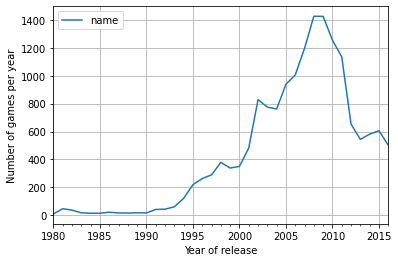

In [7]:
# grafico de juegos lanzados por año
games_by_year = df_games.groupby('year_of_release')[
    'name'].count().reset_index()
games_by_year.plot(kind='line', x='year_of_release', y='name',
                   xlabel='Year of release', ylabel='Number of games per year', grid=True)

Por lo visto en la gráfica anterior, se creará un hisotiral de las plataformas a partir del año 2000 ya que su auge fue a partir de este año. Manteniendo así un crecimiento constante y se eliminarán los datos del 2011 hacia atrás para trabajar con datos recientes y planear el plan de negocios para el 2017.
También se puede apreciar que los años en que hubo mas lanzamientos de juegos fueron entre el 2007 y el 2010 siendo entre el 2008 y el 2009 de más éxito.

### Historial de vida útil
En éste punto se creará un historial de la vida util de las plataformas mas vendidas a partir del año 2000 que fue el auge de los videojuegos para ver cuantos años aproximadamente dura una cónsola. 

In [8]:
# filtro de datos de acuerdo a la plataforma y año de lanzamiento con sus ventas totales.
plat_lifespan = df_games.groupby(['year_of_release', 'platform'])[
    ['other_sales', 'na_sales', 'eu_sales', 'jp_sales', 'total_sales']].sum().reset_index()

# Orden de datos para revisar los más vendidos.
oldplat_lifespan = plat_lifespan.groupby(
    'platform')['total_sales'].sum().reset_index()
oldplat_lifespan = oldplat_lifespan.sort_values(
    by='total_sales', ascending=False)
oldplat_lifespan.head()

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78


<AxesSubplot:title={'center':'Ventas totales por plataforma a través de los años'}, xlabel='Año de lanzamiento', ylabel='Ventas totales'>

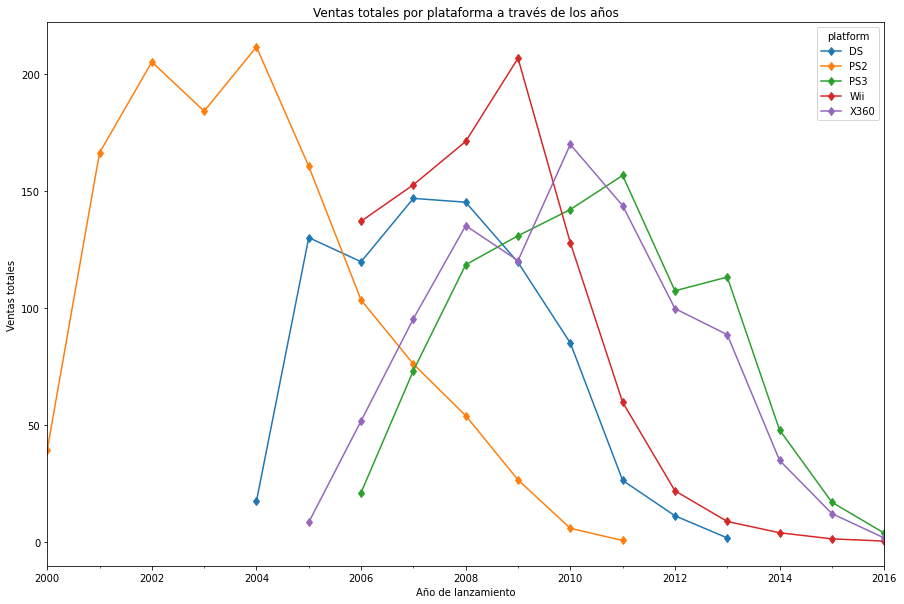

In [9]:
# selección de datos para las 5 plataformas mas vendidas
platforms = ('PS2', 'X360', 'PS3', 'Wii', 'DS')
plat_lifespan = plat_lifespan[plat_lifespan['platform'].isin(platforms)]

# Reorganización de dataframe para crear grafico por plataforma para ver su vida útil.
plat_lifespan = plat_lifespan.pivot(
    index='year_of_release', columns='platform', values='total_sales')

plat_lifespan = plat_lifespan[plat_lifespan.index.year >= 2000]


# Gráfica de linea para cada una de la plataforma en el paso de los años
plat_lifespan.plot(kind='line', marker='d', figsize=(15, 10), xlabel='Año de lanzamiento',
                   ylabel='Ventas totales', title='Ventas totales por plataforma a través de los años')

En la gráfica, se puede llengar a la conclusión de que todas las plataformas siguen dos patrones:
1. su vida es entre 9 y 11 años
2. a partir de la mitad de su vida útil es cuando alcanzan su mayor auge en venta. (cuando son mas rentables) A partir de ahí, comienza su declive.

<AxesSubplot:xlabel='Platform', ylabel='Total Sales'>

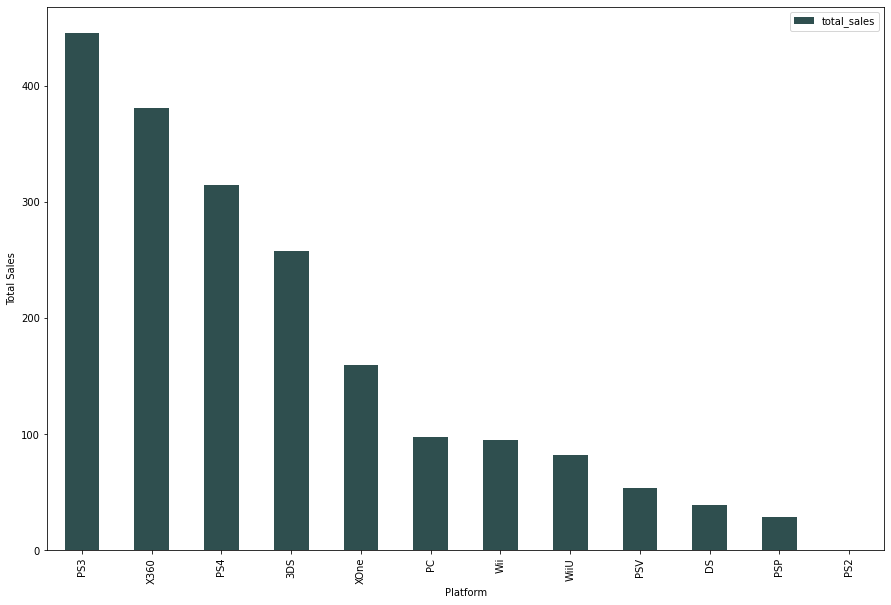

In [10]:

# Eliminación de datos anteriores al año 2011
games_upd = df_games[(df_games['year_of_release'].dt.year >= 2011)]


# guardar en una nueva gráfica solo las plataformas con su total de ventas
games_by_platform = games_upd.groupby(
    'platform')['total_sales'].sum().reset_index()

# ordenar de mayor a menor en cuanto a ventas totales
games_by_platform = games_by_platform.sort_values(
    by='total_sales', ascending=False)

# grafica de barras para ver el comportamiento de la venta de plataformas
games_by_platform.plot(kind='bar', x='platform', y='total_sales', xlabel='Platform',
                       ylabel='Total Sales', figsize=(15, 10), color='darkslategray')

De acuerdo a los resultados de la gráfica, se tomarán las 5 plataformas de videojuegos mejor vendidas: PS3, X360, PS4, 3DS y XOne, las demás tienen una venta baja en comparación con éstas.

In [11]:
# selección de datos para las 5 plataformas principales
platforms = ('PS3', 'X360', 'PS4', '3DS', 'XOne')

# Asignación de dataframe con plataformas y años filtrados. Ésta se usará para todas las actividades del proyecto:'games2'
games2 = games_upd[games_upd['platform'].isin(platforms)]


# filtro de datos de acuerdo a la plataforma y año de lanzamiento con sus ventas totales.
platform_sales = games2.groupby(['year_of_release', 'platform'])[
    ['other_sales', 'na_sales', 'eu_sales', 'jp_sales', 'total_sales']].sum().reset_index()

<AxesSubplot:title={'center':'Ventas totales por plataforma'}, xlabel='Año de lanzamiento', ylabel='Ventas totales'>

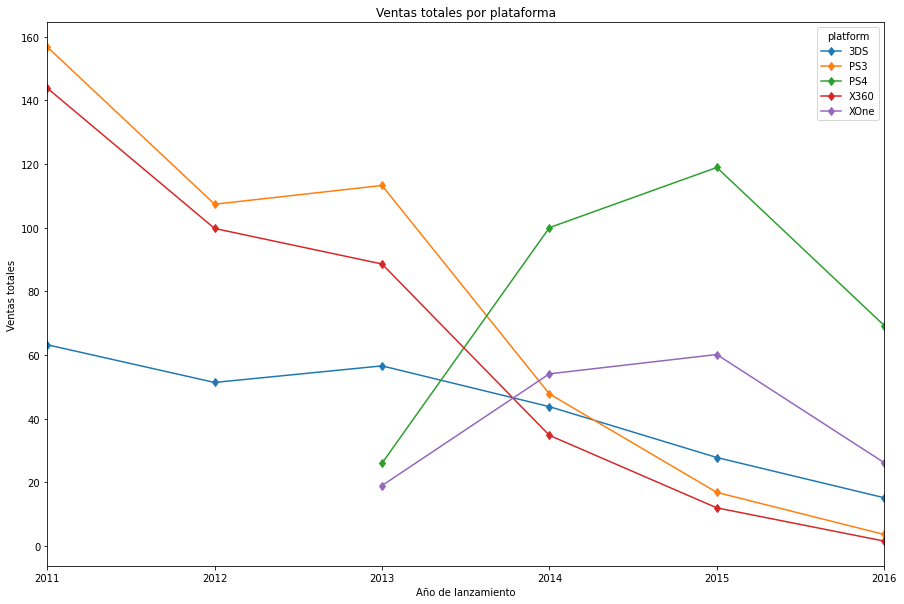

In [12]:

# Reorganización de dataframe para crear grafico por plataforma
pivot_games = platform_sales.pivot(
    index='year_of_release', columns='platform', values='total_sales')

# Gráfica de linea para cada una de la plataforma en el paso de los años
pivot_games.plot(kind='line', marker='d', figsize=(15, 10), xlabel='Año de lanzamiento',
                 ylabel='Ventas totales', title='Ventas totales por plataforma')

##### <center>PLATAFORMA SELECCIONADA: Play Station 3 (PS3) </center>

### Comparación entre críticas y ventas

El coeficiente de correlación es de: 0.38011114718290767


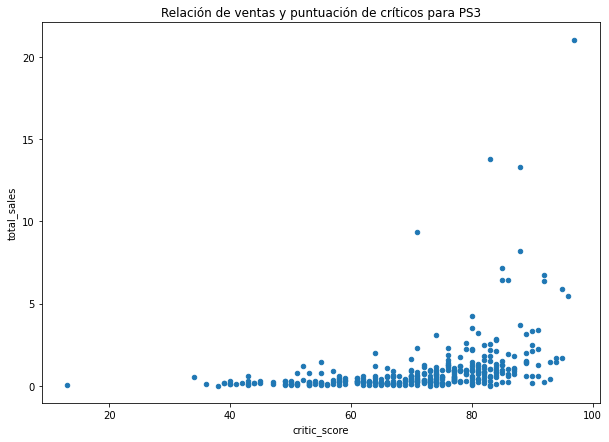

In [13]:
# Filtro de datos para nintendo PS3
PS3_games = games2[(games2['platform'] == 'PS3')]


# Creación de gráfica de dispersión para venta-puntuación de criticos.
PS3_games.plot(kind='scatter', figsize=(10, 7), x='critic_score', y='total_sales',
               title='Relación de ventas y puntuación de críticos para PS3')

print('El coeficiente de correlación es de:',
      PS3_games['total_sales'].corr(PS3_games['critic_score']))

El coeficiente de correlación es de: 0.014089348308019395


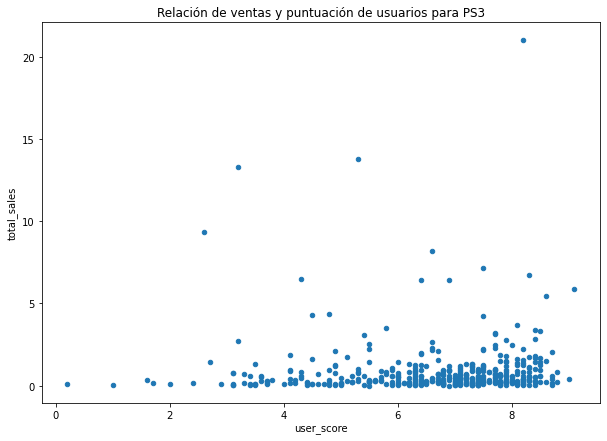

In [14]:
# Creación de gráfica de dispersión para venta-puntuación de usuarios.
PS3_games.plot(kind='scatter', figsize=(10, 7), x='user_score', y='total_sales',
               title='Relación de ventas y puntuación de usuarios para PS3')

print('El coeficiente de correlación es de:',
      PS3_games['total_sales'].corr(PS3_games['user_score']))

#### CONCLUSIÓN
Con las gráficas, podemos concluir que en ambas críticas, el coeficiente de correlación no es lo suficientemente fuerte en la primera y demasiado bajo en la segunda como para decir que, dependiendo de la calificación del título, son las ventas realizadas. 

### Títulos de DS en diferentes plataformas

<AxesSubplot:title={'center':'Ventas totales de juegos de PS3 en diferentes plataformas'}, xlabel='Plataformas', ylabel='Ventas totales'>

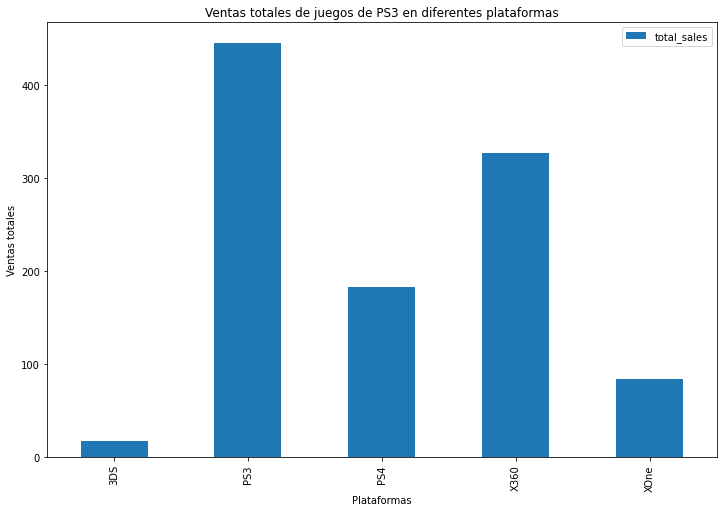

In [15]:
# lista de juegos de la plataforma PS3
PS3_uniques = PS3_games['name'].reset_index(drop=True)

# Creacion de lista nueva donde los nombres de juegos la plataforma DS coincidan con las otras consolas
PS3_platnames = games2[games2['name'].isin(PS3_uniques)]

# Agrupamiento por consolas y ventas totales.
PS3_platnames = PS3_platnames.groupby(
    ['platform'])['total_sales'].sum().reset_index()

# Gráfica de barras para comparar datos.
PS3_platnames.plot(kind='bar', x='platform', y='total_sales', figsize=(12, 8), ylabel='Ventas totales',
                   xlabel='Plataformas', title='Ventas totales de juegos de PS3 en diferentes plataformas')

Se puede ver que los títulos del PS3 en las demás plataformas no tienen tantas ventas como en éste. 

### Géneros de videojuegos

<AxesSubplot:xlabel='genre'>

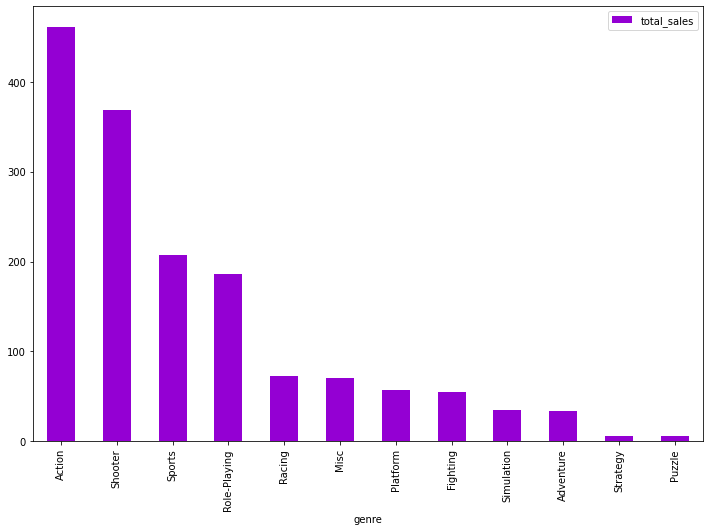

In [16]:
# Organización por genero
genre = games2.groupby(['genre'])['total_sales'].sum().reset_index()
genre = genre.sort_values(by='total_sales', ascending=False)
genre.plot(kind='bar', x='genre', y='total_sales',
           figsize=(12, 8), color='darkviolet')

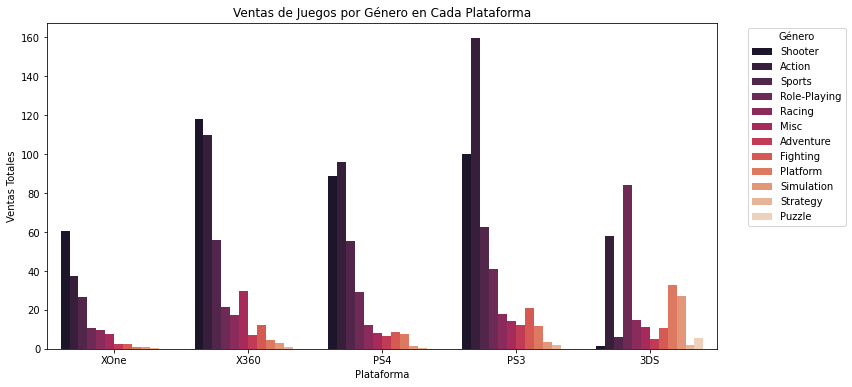

In [17]:
# Organización por género y plataforma
game_by_genre = games2.groupby(['genre', 'platform'])[
    'total_sales'].sum().reset_index()

# Orden de DataFrame por platform y total_sales en orden descendente
game_by_genre = game_by_genre.sort_values(
    by=['platform', 'total_sales'], ascending=[False, False])


plt.figure(figsize=(12, 6))
sns.barplot(x='platform', y='total_sales', hue='genre',
            data=game_by_genre, palette='rocket')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales')
plt.title('Ventas de Juegos por Género en Cada Plataforma')
plt.legend(title='Género', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

### Conclusión
Los géneros de videojuegos que más se han vendido son: Action y shooters como se puede apreciar en las gráficas. Incluso si las separamos por cónsolas se pueden ver que éstos mismos siguen siendo líderes en venta.

## Paso 4 Perfil de usuario para cada región

### <center> ***PERFIL DE NORTE AMERICA (NA)***</center>

### Plataformas principales

platform
X360    226.80
PS3     168.26
PS4     108.74
XOne     93.12
3DS      82.65
Name: na_sales, dtype: float64

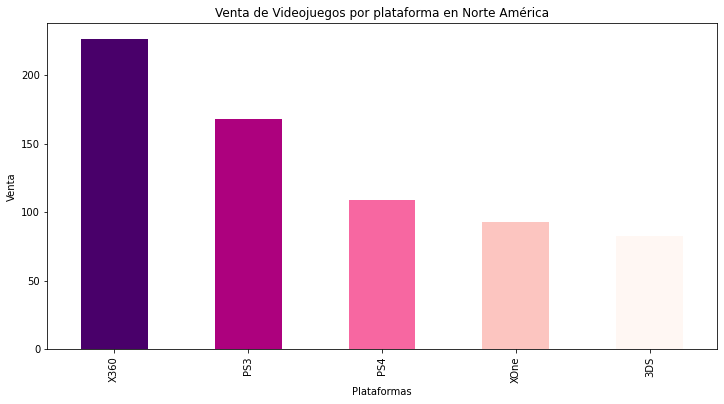

In [18]:
# Limpieza de tabla para dejar solo la columna perteneciente a Norte America
na_games = games2.drop(['eu_sales', 'jp_sales', 'total_sales'], axis=1)

# Orden de plataformas de mayor venta a menor
na_games_platform = games2.groupby(
    'platform')['na_sales'].sum().sort_values(ascending=False)

# Impresión de las 5 plataformas mas vendidas en Norte América
na_games_platform.head()

# Gráfica de las plataformas de la mas vendida a la menos.
colors = colores = list(reversed(plt.cm.RdPu(
    np.linspace(0, 1, len(na_games_platform)))))
na_games_platform.plot(kind='bar', xlabel='Plataformas', ylabel='Venta',
                       title='Venta de Videojuegos por plataforma en Norte América', figsize=(12, 6), color=colors)
na_games_platform.head()

### Géneros principales

genre
Action          192.07
Shooter         181.59
Sports           98.26
Role-Playing     66.63
Misc             37.39
Name: na_sales, dtype: float64

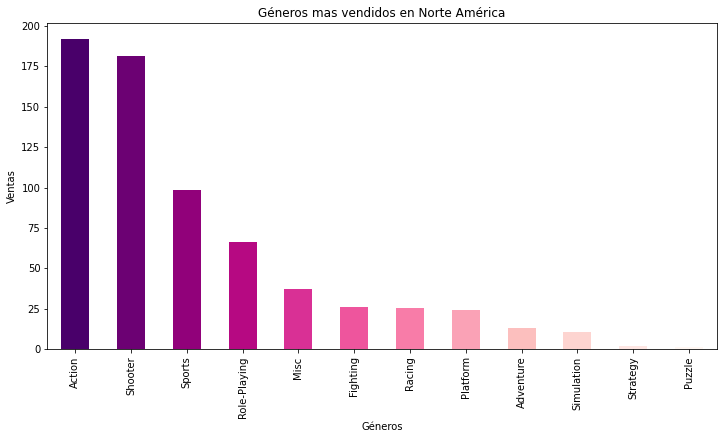

In [19]:
# Orden por generos de mayor venta a menor
na_games_genre = games2.groupby(
    'genre')['na_sales'].sum().sort_values(ascending=False)

# Gráfica de los géneros del mas vendido al menos.
colors = colores = list(reversed(plt.cm.RdPu(
    np.linspace(0, 1, len(na_games_genre)))))
na_games_genre.plot(kind='bar', xlabel='Géneros', ylabel='Ventas',
                    title='Géneros mas vendidos en Norte América', figsize=(12, 6), color=colors)
na_games_genre.head()

### Clasificaciones mas vendidas

rating
M       285.07
E       134.66
T        88.71
E10+     68.85
Name: na_sales, dtype: float64

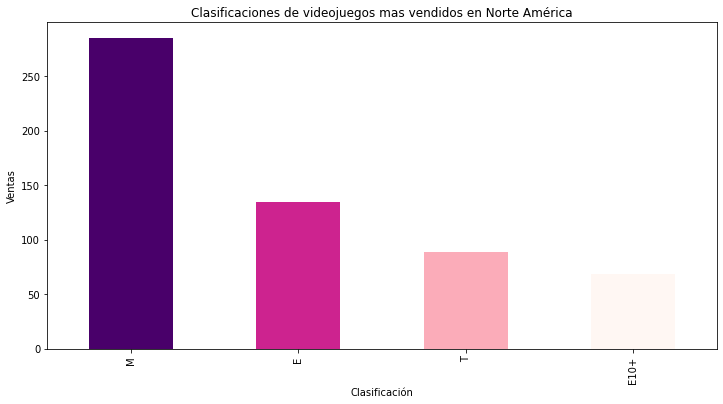

In [20]:
# Orden por clasificación ESRB de mayor venta a menor
na_games_esrb = games2.groupby(
    'rating')['na_sales'].sum().sort_values(ascending=False)

# Gráfica de los géneros del mas vendido al menos.
colors = colores = list(reversed(plt.cm.RdPu(
    np.linspace(0, 1, len(na_games_esrb)))))
na_games_esrb.plot(kind='bar', xlabel='Clasificación', ylabel='Ventas',
                   title='Clasificaciones de videojuegos mas vendidos en Norte América', figsize=(12, 6), color=colors)
na_games_esrb.head()

### Conclusiones para el perfil de Norte América
Las plataformas mas vendidas en esta región son: X360, PS3, PS4, XOne y 3DS.

Los 5 géneros principales son: Action, Shooters, Sports, Role playing y Misc. Las ventas de los juegos de acción y deportes van con mucha diferencia del resto, ya que contienen características de reflejos rápidos y emoción a la hora de jugar, por lo que los convierte en mas atractivos para el público. En secuencia, siguen los sports que son de deporte; role playing que son juegos de rol y estrategia y por último Misc o aquellos que no cuentan con un género en específico, sino varios. 

En la tercer gráfica, podemos observar que la clasificación de juegos mas vendida en Norte América es: 'M' = Mature (mayores de 17), por lo que su público va dirigido a adultos y por lo que muestra la gráfica se puede deducir que sí influye en la venta de videojuegos ya que su ingreso ha sido de casi la mitad mas que cualquier otro.


### <center> ***PERFIL DE LA UNIÓN EUROPEA (EU)***</center>

### Plataformas principales

platform
PS3     163.10
PS4     141.09
X360    117.10
3DS      61.27
XOne     51.59
Name: eu_sales, dtype: float64

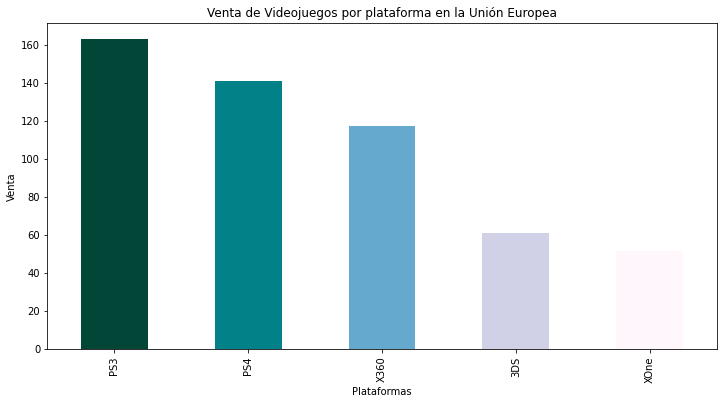

In [21]:
# Limpieza de tabla para dejar solo la columna perteneciente a EU
eu_games = games2.drop(['na_sales', 'jp_sales', 'total_sales'], axis=1)

# Orden de plataformas de mayor venta a menor
eu_games_platform = eu_games.groupby(
    'platform')['eu_sales'].sum().sort_values(ascending=False)

# Impresión de las 5 plataformas mas vendidas en Norte América
eu_games_platform.head()

# Gráfica de las plataformas de la mas vendida a la menos.
colors = colores = list(reversed(plt.cm.PuBuGn(
    np.linspace(0, 1, len(eu_games_platform)))))
eu_games_platform.plot(kind='bar', xlabel='Plataformas', ylabel='Venta',
                       title='Venta de Videojuegos por plataforma en la Unión Europea', figsize=(12, 6), color=colors)
eu_games_platform.head()

### Géneros principales

genre
Action          165.19
Shooter         132.11
Sports           76.15
Role-Playing     47.51
Racing           34.26
Name: eu_sales, dtype: float64

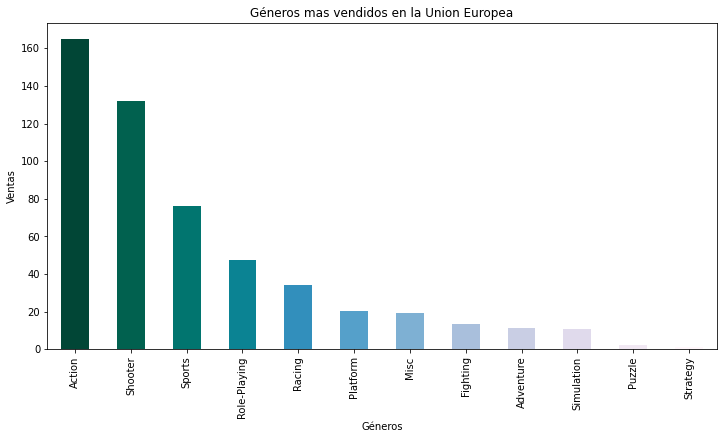

In [22]:
# Orden por generos de mayor venta a menor
eu_games_genre = games2.groupby(
    'genre')['eu_sales'].sum().sort_values(ascending=False)

# Gráfica de los géneros del mas vendido al menos.
colors = colores = list(reversed(plt.cm.PuBuGn(
    np.linspace(0, 1, len(eu_games_genre)))))
eu_games_genre.plot(kind='bar', xlabel='Géneros', ylabel='Ventas',
                    title='Géneros mas vendidos en la Union Europea', figsize=(12, 6), color=colors)
eu_games_genre.head()

### Clasificaciones mas vendidas

rating
M       219.68
E       113.65
T        62.88
E10+     44.66
Name: eu_sales, dtype: float64

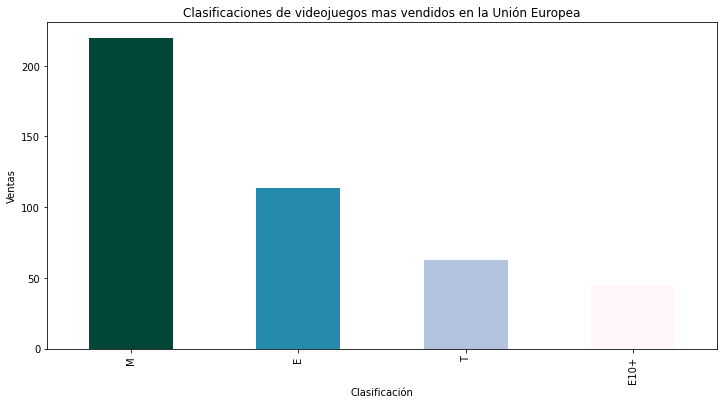

In [23]:
# Orden por clasificación ESRB de mayor venta a menor
eu_games_esrb = games2.groupby(
    'rating')['eu_sales'].sum().sort_values(ascending=False)

# Gráfica de los géneros del mas vendido al menos.
colors = colores = list(reversed(plt.cm.PuBuGn(
    np.linspace(0, 1, len(eu_games_esrb)))))
eu_games_esrb.plot(kind='bar', xlabel='Clasificación', ylabel='Ventas',
                   title='Clasificaciones de videojuegos mas vendidos en la Unión Europea', figsize=(12, 6), color=colors)
eu_games_esrb.head()

### Conclusiones para el perfil de la Unión Europea 
Las plataformas mas vendidas en esta región son: PS3, PS4, X360, 3DS, XOne. Las 3 primeras resultaron ser de mayor popularidad

Los 5 géneros principales son: Action, Shooters, Sports, Role Playing y racing. Las ventas de los juegos de la Union Europea en cuanto a género, resultó ser muy parecido a los principales de Norte America. Resultó que al igual que en el perfil anterior los juegos de Acción y shooters ganaron por mucho el primer lugar en ventas. 

En la tercer gráfica, podemos observar que la clasificación de juegos mas vendida es: 'M' = Mature (mayores de 17), por lo que su público va dirigido a adultos y por lo que muestra la gráfica se puede deducir que sí influye en la venta de videojuegos ya que su ingreso ha sido de casi la mitad mas que cualquier otro.

### <center> ***PERFIL DE JAPÓN (JP)***</center>

### Plataformas principales

platform
3DS     100.62
PS3      49.39
PS4      15.96
X360      3.35
XOne      0.34
Name: jp_sales, dtype: float64

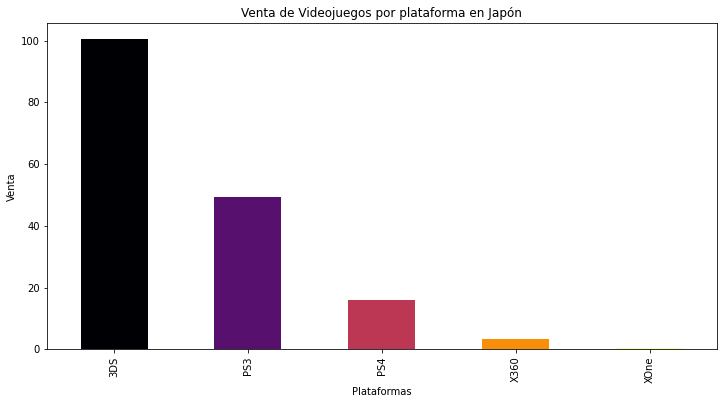

In [24]:
# Limpieza de tabla para dejar solo la columna perteneciente a JP
jp_games = games2.drop(['eu_sales', 'na_sales', 'total_sales'], axis=1)

# Orden de plataformas de mayor venta a menor
jp_games_platform = jp_games.groupby(
    'platform')['jp_sales'].sum().sort_values(ascending=False)

# Impresión de las 5 plataformas mas vendidas
jp_games_platform.head()

# Gráfica de las plataformas de la mas vendida a la menos.
colors = colores = plt.cm.inferno(np.linspace(0, 1, len(jp_games_platform)))

jp_games_platform.plot(kind='bar', xlabel='Plataformas', ylabel='Venta',
                       title='Venta de Videojuegos por plataforma en Japón', figsize=(12, 6), color=colors)
jp_games_platform.head()

### Géneros principales

genre
Role-Playing    56.46
Action          48.51
Simulation      11.31
Shooter         10.14
Fighting         8.95
Name: jp_sales, dtype: float64

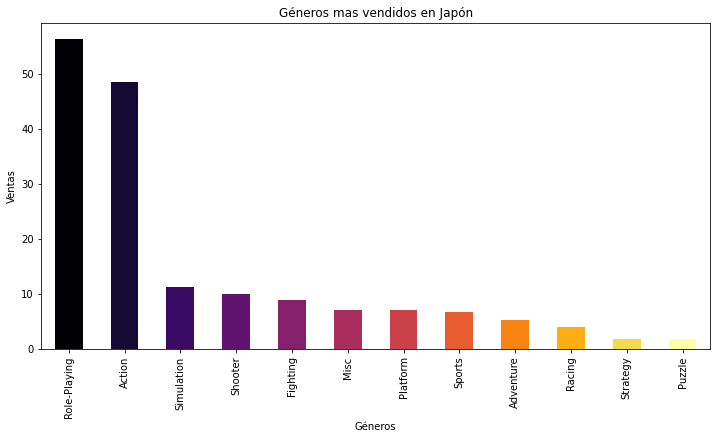

In [25]:
# Orden por generos de mayor venta a menor
jp_games_genre = games2.groupby(
    'genre')['jp_sales'].sum().sort_values(ascending=False)

# Gráfica de los géneros del mas vendido al menos.
colors = colores = plt.cm.inferno(np.linspace(0, 1, len(jp_games_genre)))

jp_games_genre.plot(kind='bar', xlabel='Géneros', ylabel='Ventas',
                    title='Géneros mas vendidos en Japón', figsize=(12, 6), color=colors)
jp_games_genre.head()

### Clasificaciones mas vendidas

rating
M       219.68
E       113.65
T        62.88
E10+     44.66
Name: eu_sales, dtype: float64

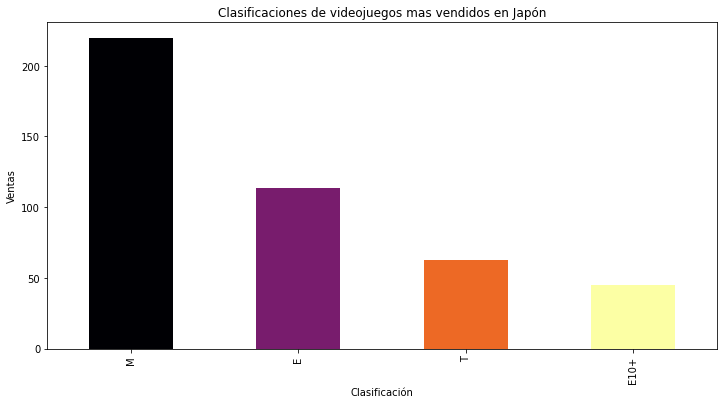

In [26]:
# Orden por clasificación ESRB de mayor venta a menor
jp_games_esrb = games2.groupby(
    'rating')['eu_sales'].sum().sort_values(ascending=False)

# Gráfica de los géneros del mas vendido al menos.
colors = colores = plt.cm.inferno(np.linspace(0, 1, len(jp_games_esrb)))

jp_games_esrb.plot(kind='bar', xlabel='Clasificación', ylabel='Ventas',
                   title='Clasificaciones de videojuegos mas vendidos en Japón', figsize=(12, 6), color=colors)
jp_games_esrb.head()

### Conclusiones para el perfil de Japón 
Las plataformas mas vendidas en esta región son: 3DS, PS3, PS4, N360 y XOne. La venta de la primera fue mucho mas que el resto.

Los 5 géneros principales son: Role-playing, Action, Sports, simulation, shooters y fighting. Las ventas de los juegos de Japón, en el primer lugar se lo llevan los Role-Playing, o juegos de Rol. A diferencia de los dos perfiles anteriores.

En la tercer gráfica, podemos observar que la clasificación de juegos mas vendida es: 'M' = Mature (mayores de 17), por lo que su público va dirigido a adultos y por lo que muestra la gráfica se puede deducir que sí influye en la venta de videojuegos ya que su ingreso ha sido de casi la mitad mas que cualquier otro.

## Paso 5. Prueba de hipótesis

### ***Prueba de hipótesis entre plataformas***

Hipótesis nula (H<sub>0</sub>): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Hipótesis alternativa (H<sub>1</sub>): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.


In [27]:
# df con los valores de user score en Xbox
# para las pruebas de hipotesis se utilizará el dataframe "games_upd" que cuenta con los datos filtrados del 2011 en delante
xbox_games = games_upd.query('platform == "XOne"')[
    'user_score'].dropna().reset_index(drop=True)

# df con los valores de user score en PC
pc_games = games_upd.query('platform == "PC"')[
    'user_score'].dropna().reset_index(drop=True)

alpha = 0.05

result = st.ttest_ind(xbox_games, pc_games)
print('valor p: ', result.pvalue)

if result.pvalue < alpha:
    print("Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes")
else:
    print("Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas")

valor p:  0.6267602271422398
Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas


Como podemos ver, el valor de p es mayor que el alfa de 0.05 que le pusimos como condicional así que la probabilidad de que las calificaciones de los usuarios sean iguales entre las dos plataformas esta bien, por lo que se acepta la hipótesis nula. 

### ***Prueba de hipótesis entre géneros***

Hipótesis nula (H<sub>0</sub>): Las calificaciones promedio de los usuarios para los géneros de acción y deportes son los mismos.

Hipótesis alternativa (H<sub>1</sub>): Las calificaciones promedio de los usuarios para los géneros de acción y deportes son diferentes.

In [28]:
# df con los valores de user score en action
action_games = games_upd.query('genre == "Action"')[
    'user_score'].dropna().reset_index(drop=True)

# df con los valores de user score en sports
sports_games = games_upd.query('genre == "Sports"')[
    'user_score'].dropna().reset_index(drop=True)

alpha = 0.05

result = st.ttest_ind(action_games, sports_games)
print('valor p: ', result.pvalue)

if result.pvalue < alpha:
    print("Las calificaciones promedio de los usuarios para los géneros de acción y deportes son diferentes")
else:
    print("Las calificaciones promedio de los usuarios para los géneros de acción y deportes son los mismos")

valor p:  5.1974550252152054e-24
Las calificaciones promedio de los usuarios para los géneros de acción y deportes son diferentes


Al aplicar la formula, el valor obtenido de p es menor al alpha de 0.05 por lo que la hipótesis nula es rechazada, así que las calificaciones promedio de los usuarios para los géneros de acción y deportes son diferentes. 

## Paso 6. Conclusión general

El viaje de los videojuegos junto con sus consolas a tavés del tiempo ha evolucionado de manera significativa. Hasta el año 1995 se pudo ver en la gráfica que se mantuvo un perfil bajo y constante, pero, entre el 95 y el 2000 comenzó a subir con algunos altibajos. 
Los datos a considerar durante el paso 3 se tomaron a partir del año 2011 ya que con ese periodo se pueden analizar y ver el mejor plan de acción para el 2017.
En cuanto a las consolas, éstas han pasado por un periodo de vida entre aproximadamente 9 y 11 años, siendo justo a la mitad de su lanzamiento cuando alcanzan su mayor auge.
La finalidad de éste análisis de datos es poder detectar áreas de oportunidad para el 2017 y poder lanzar una buena campaña publicitaria. 
Con los datos que hemos podido analizar, el panorama no es muy prometedor para el 2017 ya que todas las consolas actuales comienzan su declive como se ve en la grafica del paso 3. sin embargo, una muy buena campaña podría estar presente al tomar en cuenta los siguientes puntos:
 - Al revisar los perfiles para las tres regiones, la clasificación mas vendida fue 'M', para todo publico mayor de edad y los géneros de acción y shooter. 
 - Una de las plataformas mas vendidas fue el PS3 y su antecesor el PS2 dejó muchas ganancias antes de llegar a su fín y la diferencia de lanzamientos fue de tan solo 6 años, justo a mitad de su vida útil.
 - De las 5 plataformas mas vendidas a partir del año 2011, tres ya van en declive. Éstas son: N360, 3DS, PS3 y las que se podrían rescatar aún son el PS4 y el XOne
 - la región que mas ingresos tuvo fue Norte América, siguiendole la Unión Europea y por último Japón. Éste con ventas muy por debajo de las otras dos. 

Así que como campaña publicitariay un plan de ventas para el 2017 podría involucrar títulos de acción y shooters con clasificación 'M', que son las que mas público abarcan en las regiones de mayor ingreso para las consolas que van por mitad de su vida útil como el ps4 y el XOne.